# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
# Criando duas faixas de latitude:
sinasc_raw['latitude_band'] = pd.cut(sinasc_raw['munResLat'], bins=[-np.inf, -10.5, np.inf], labels=['Abaixo de -10.5', 'Acima de  -10.5'])


# Selecionando 'IDADEMAE' e 'APGAR5':
num_cols = ['IDADEMAE', 'APGAR5']


# Aplicando GROUPBY() usando as faixas como chave:
grouped = sinasc_raw.groupby('latitude_band')[num_cols].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
# Renomeando o nome das colunas
grouped.columns = grouped.columns.set_levels(['soma', 'média', 'mínimo', 'máximo', 'mediana', 'desvio_padrão', 'variância'], level=1)


# Mostrando o resultado:
grouped


IDADEMAE                                                 \
                    soma      média mínimo máximo mediana desvio_padrão   
latitude_band                                                             
Abaixo de -10.5   340143  26.178943     12     53    26.0      6.320385   
Acima de  -10.5   365094  26.014964     11     52    25.0      6.447663   

                              APGAR5                                  \
                 variância      soma     média mínimo máximo mediana   
latitude_band                                                          
Abaixo de -10.5  39.947272  118393.0  9.138788    0.0   10.0     9.0   
Acima de  -10.5  41.572355  128746.0  9.216551    0.0   10.0     9.0   

                                         
                desvio_padrão variância  
latitude_band                            
Abaixo de -10.5      0.805381  0.648638  
Acima de  -10.5      0.774741  0.600224

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [6]:
# Criando duas faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000:
sinasc_raw['area_band'] = pd.cut(sinasc_raw['munResArea'], bins=[-np.inf, 3000, np.inf], labels=['Abaixo de 3000', 'Acima de 3000'])

# Selecionando 'QTDFILVIVO' e 'QTDFILMORT':
num_cols = ['IDADEMAE', 'QTDFILVIVO']


# Aplicando GROUPBY() usando as faixas como chave:
grouped = sinasc_raw.groupby('area_band')[num_cols].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
# Renomeando o nome das colunas
grouped.columns = grouped.columns.set_levels(['soma', 'média', 'mínimo', 'máximo', 'mediana', 'desvio_padrão', 'variância'], level=1)

# Print the result
grouped


IDADEMAE                                                 \
                   soma      média mínimo máximo mediana desvio_padrão   
area_band                                                                
Abaixo de 3000   137389  26.324775     11     53    26.0      6.305535   
Acima de 3000    567848  26.038518     12     53    25.0      6.405497   

                          QTDFILVIVO                                  \
                variância       soma     média mínimo máximo mediana   
area_band                                                              
Abaixo de 3000  39.759775     4773.0  0.924284    0.0   30.0     1.0   
Acima de 3000   41.030387    22053.0  1.086890    0.0   14.0     1.0   

                                        
               desvio_padrão variância  
area_band                               
Abaixo de 3000      1.075442  1.156575  
Acima de 3000       1.191750  1.420268

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [7]:
# Criando
sinasc_raw['altitude_band'] = pd.cut(sinasc_raw['munResAlt'], bins=[-np.inf, 500, 1000, np.inf], labels=['Abaixo de 500', 'Entre 500-1000', 'Acima de 1000'])

# Select 'IDADEPAI' e 'QTDFILMORT' as the numerical columns
num_cols = ['IDADEPAI', 'QTDFILMORT']

# Aplicando GROUPBY() usando as faixas como chave:
grouped = sinasc_raw.groupby('altitude_band')[num_cols].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
# Renomeando o nome das colunas
grouped.columns = grouped.columns.set_levels(['soma', 'média', 'mínimo', 'máximo', 'mediana', 'desvio_padrão', 'variância'], level=1)


# Resultado:
grouped


IDADEPAI                                                 \
                    soma      média mínimo máximo mediana desvio_padrão   
altitude_band                                                             
Abaixo de 500   230692.0  31.023669   15.0   86.0    30.0      7.777849   
Entre 500-1000    5806.0  34.152941   18.0   60.0    34.0      6.812807   
Acima de 1000        0.0        NaN    NaN    NaN     NaN           NaN   

                          QTDFILMORT                                  \
                variância       soma     média mínimo máximo mediana   
altitude_band                                                          
Abaixo de 500   60.494934     6245.0  0.267486    0.0    9.0     0.0   
Entre 500-1000  46.414340      398.0  0.251580    0.0   28.0     0.0   
Acima de 1000         NaN        0.0       NaN    NaN    NaN     NaN   

                                        
               desvio_padrão variância  
altitude_band                           
Abaixo de 500       0.592095  0.350576  
Entre 500-1000      0.874790  0.765257  
Acima de 1000            NaN       NaN

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [57]:
sinasc_raw = pd.DataFrame(sinasc_raw)

# Mapeando as regiões imediatas de Rondônia
regiao_imediata = {
    'Candeias do Jamari': 'Porto Velho',
    'Guajará-Mirim': 'Porto Velho',
    'Itapuã do Oeste': 'Porto Velho',
    'Nova Mamoré': 'Porto Velho',
    'Porto Velho': 'Porto Velho',
    'Alto Paraíso': 'Ariquemes',
    'Ariquemes': 'Ariquemes',
    'Buritis': 'Ariquemes',
    'Cacaulândia': 'Ariquemes',
    'Campo Novo de Rondônia': 'Ariquemes',
    'Cujubim': 'Ariquemes',
    'Monte Negro': 'Ariquemes',
    'Rio Crespo': 'Ariquemes',
    'Governador Jorge Teixeira': 'Jaru',
    'Jaru': 'Jaru',
    'Machadinho d\'Oeste': 'Jaru',
    'Theobroma': 'Jaru',
    'Vale do Anari': 'Jaru',
    'Alvorada d\'Oeste': 'Ji-Paraná',
    'Costa Marques': 'Ji-Paraná',
    'Ji-Paraná': 'Ji-Paraná',
    'Mirante da Serra': 'Ji-Paraná',
    'Nova União': 'Ji-Paraná',
    'Ouro Preto do Oeste': 'Ji-Paraná',
    'Presidente Médici': 'Ji-Paraná',
    'São Francisco do Guaporé': 'Ji-Paraná',
    'São Miguel do Guaporé': 'Ji-Paraná',
    'Seringueiras': 'Ji-Paraná',
    'Teixeirópolis': 'Ji-Paraná',
    'Urupá': 'Ji-Paraná',
    'Vale do Paraíso': 'Ji-Paraná',
    'Alta Floresta d\'Oeste': 'Cacoal',
    'Alto Alegre dos Parecis': 'Cacoal',
    'Cacoal': 'Cacoal',
    'Castanheiras': 'Cacoal',
    'Espigão d\'Oeste': 'Cacoal',
    'Ministro Andreazza': 'Cacoal',
    'Nova Brasilândia d\'Oeste': 'Cacoal',
    'Novo Horizonte do Oeste': 'Cacoal',
    'Parecis': 'Cacoal',
    'Pimenta Bueno': 'Cacoal',
    'Primavera de Rondônia': 'Cacoal',
    'Rolim de Moura': 'Cacoal',
    'Santa Luzia d\'Oeste': 'Cacoal',
    'São Felipe d\'Oeste': 'Cacoal',
    'Cabixi': 'Vilhena',
    'Cerejeiras': 'Vilhena',
    'Chupinguaia': 'Vilhena',
    'Colorado do Oeste': 'Vilhena',
    'Corumbiara': 'Vilhena',
    'Pimenteiras do Oeste': 'Vilhena',
    'Vilhena': 'Vilhena'
}

# Criando uma nova coluna por região:
sinasc_raw['region'] = sinasc_raw['munResNome'].map(regiao_imediata)

# COnvertendo os dados para datetime  e extraindo o ano e mês
sinasc_raw['date'] = pd.to_datetime(sinasc_raw['DTNASC'])
sinasc_raw['year_month'] = sinasc_raw['date'].dt.to_period('M')

# Agrupando por ano-mês e região, e calculando a idade médias das mães:
grouped = sinasc_raw.groupby(['year_month', 'region'])['IDADEMAE'].mean().unstack()

#Resultado
grouped

region,Ariquemes,Cacoal,Jaru,Ji-Paraná,Porto Velho,Vilhena
year_month,,,,,,
2019-01,24.866412,26.435115,26.037037,25.845411,26.017668,26.665049
2019-02,25.316239,26.253676,26.105882,26.513298,26.215000,26.781818
2019-03,25.288660,26.560000,26.183486,25.476404,26.347207,26.386667
2019-04,25.411972,26.127517,25.561224,26.099526,26.172336,26.686099
2019-05,25.410256,26.478873,25.009615,25.869464,25.830470,25.586207
2019-06,26.652510,25.798535,26.637363,26.215190,26.421628,26.526627
2019-07,24.973783,26.817518,24.757895,25.911357,26.139903,26.373057
2019-08,25.684615,26.608527,25.742857,25.897098,26.070588,26.297436
2019-09,25.561644,27.009709,25.694737,25.621495,25.966435,26.407407


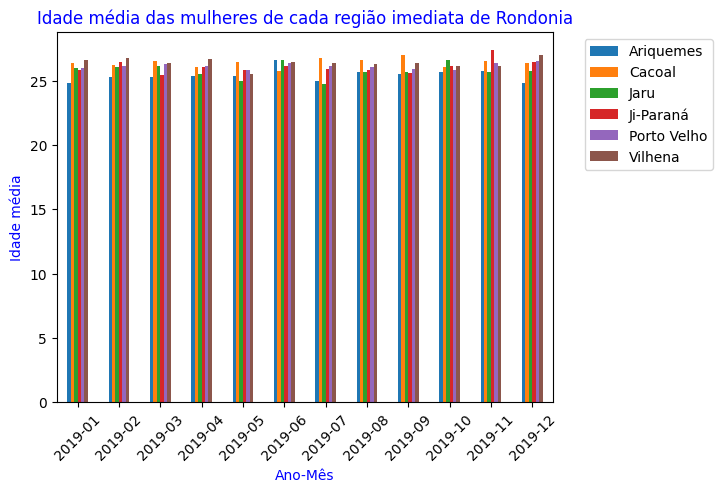

In [58]:
# Plotando o resultado em um gráfico de barras
grouped.plot(kind='bar')
plt.title('Idade média das mulheres de cada região imediata de Rondonia', color = 'blue')
plt.xlabel('Ano-Mês', color ='blue')
plt.ylabel('Idade média', color = 'blue')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [59]:
#Definindo o mapeamento para o IDH
mapeamento_idh = {
    "Porto Velho": "IDH-M alto",
    "Vilhena": "IDH-M alto",
    "Cacoal": "IDH-M alto",
    "Ji-Paraná": "IDH-M alto",
    "Pimenta Bueno": "IDH-M alto",
    "Ariquemes": "IDH-M alto",
    "Rolim de Moura": "IDH-M alto",

    "Cerejeiras": "IDH-M médio",
    "Jaru": "IDH-M médio",
    "Colorado do Oeste": "IDH-M médio",
    "Ouro Preto do Oeste": "IDH-M médio",
    "Espigão D'Oeste": "IDH-M médio",
    "Santa Luzia D'Oeste": "IDH-M médio",
    "Pimenteiras do Oeste": "IDH-M médio",
    "Presidente Médici": "IDH-M médio",
    "Castanheiras": "IDH-M médio",
    "Guajará-Mirim": "IDH-M médio",
    "Chupinguaia": "IDH-M médio",
    "Cabixi": "IDH-M médio",
    "Candeias do Jamari":  "IDH-M médio",
    "São Felipe D'Oeste": "IDH-M médio",
    "Cacaulândia": "IDH-M médio",
    "São Miguel do Guaporé": "IDH-M médio",
    "Mirante da Serra": "IDH-M médio",
    "Alvorada D'Oeste": "IDH-M médio",
    "Teixeirópolis": "IDH-M médio",
    "Nova Brasilândia D'Oeste": "IDH-M médio",
    "Rio Crespo": "IDH-M médio",
    "Primavera de Rondônia": "IDH-M médio",
    "Alta Floresta D'Oeste": "IDH-M médio",
    "Ministro Andreazza": "IDH-M médio",
    "Novo Horizonte do Oeste": "IDH-M médio",
    "Vale do Paraíso": "IDH-M médio",
    "Alto Paraíso": "IDH-M médio",
    "Parecis": "IDH-M médio",
    "Buritis": "IDH-M médio",
    "Itapuã do Oeste": "IDH-M médio",
    "Corumbiara": "IDH-M médio",
    "Cujubim": "IDH-M médio",
    "Costa Marques": "IDH-M médio",
    "São Francisco do Guaporé": "IDH-M médio",
    "Urupá": "IDH-M médio",
    "Monte Negro": "IDH-M médio",

    "Seringueiras": "IDH-M baixo",
    "Governador Jorge Teixeira": "IDH-M baixo",
    "Machadinho D'Oeste": "IDH-M baixo",
    "Campo Novo de Rondônia": "IDH-M baixo",
    "Alto Alegre dos Parecis": "IDH-M baixo",
    "Theobroma": "IDH-M baixo",
    "Nova União": "IDH-M baixo",
    "Nova Mamoré": "IDH-M baixo",
    "Vale do Anari": "IDH-M baixo"
}



In [60]:
# Aplicando o mapeamento e agrupando por IDH:
sinasc_raw['grupo_IDH'] = sinasc_raw['munResNome'].map(mapeamento_idh)
agrupado_por_idh = sinasc_raw.groupby('grupo_IDH').count()

# Selecionando as colunas relevantes:
colunas_selecionadas = ['munResNome', 'APGAR5', 'QTDGESTANT', 'CONSULTAS', 'IDADEMAE']
dados_sinasc_selecionados = sinasc_raw[colunas_selecionadas]

# Definindo o índice (INDEX) e agrupando por IDH:
dados_sinasc_selecionados.set_index('munResNome', inplace=True)
agrupado_por_idh = dados_sinasc_selecionados.groupby(mapeamento_idh, dropna=False)

# Agregando os dados:
dados_agregados_idh = agrupado_por_idh.agg([('Qtd','count'), ('Mín','min'), ('Máx','max'), ('Mediana','median')])
dados_agregados_idh.rename(columns={'QTDGESTANT':'Número de gestações anteriores', 'CONSULTAS':'Número de consultas de pré-natal'}, inplace=True)

# Resultado:
dados_agregados_idh

APGAR5                     Número de gestações anteriores       \
               Qtd   Mín   Máx Mediana                            Qtd  Mín   
munResNome                                                                   
IDH-M alto   16794   0.0  10.0     9.0                          15827  0.0   
IDH-M baixo   1820   1.0  10.0     9.0                           1799  0.0   
IDH-M médio   8310   0.0  10.0     9.0                           8189  0.0   
NaN              1  10.0  10.0    10.0                              1  2.0   

                          Número de consultas de pré-natal                  \
              Máx Mediana                              Qtd Mín Máx Mediana   
munResNome                                                                   
IDH-M alto   14.0     1.0                            16855   1   9     4.0   
IDH-M baixo  11.0     1.0                             1826   1   9     4.0   
IDH-M médio  52.0     1.0                             8346   1   9     4.0   
NaN           2.0     2.0                                1   1   1     1.0   

            IDADEMAE                  
                 Qtd Mín Máx Mediana  
munResNome                            
IDH-M alto     16855  12  47    26.0  
IDH-M baixo     1826  13  46    25.0  
IDH-M médio     8346  11  53    25.0  
NaN                1  24  24    24.0

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [61]:
#Definindo o mapeamento para o IFDM
mapeamento_ifdm = {
    "Ariquemes": "IFDM Desenvolvimento moderado",
    "Vilhena": "IFDM Desenvolvimento moderado",
    "Pimenta Bueno": "IFDM Desenvolvimento moderado",
    "Porto Velho": "IFDM Desenvolvimento moderado",
    "Ji-Paraná": "IFDM Desenvolvimento moderado",
    "Cacoal": "IFDM Desenvolvimento moderado",
    "Santa Luzia D'Oeste": "IFDM Desenvolvimento moderado",
    "Rolim de Moura": "IFDM Desenvolvimento moderado",
    "Chupinguaia": "IFDM Desenvolvimento moderado",
    "São Miguel do Guaporé": "IFDM Desenvolvimento moderado",
    "Pimenteiras do Oeste": "IFDM Desenvolvimento moderado",
    "Teixeirópolis": "IFDM Desenvolvimento moderado",
    "Colorado do Oeste": "IFDM Desenvolvimento moderado",
    "Jaru": "IFDM Desenvolvimento moderado",
    "Rio Crespo": "IFDM Desenvolvimento moderado",
    "Primavera de Rondônia": "IFDM Desenvolvimento moderado",
    "Alta Floresta D'Oeste": "IFDM Desenvolvimento moderado",
    "Ouro Preto do Oeste": "IFDM Desenvolvimento moderado",
    "São Francisco do Guaporé": "IFDM Desenvolvimento moderado",
    "Candeias do Jamari": "IFDM Desenvolvimento moderado",
    "Buritis": "IFDM Desenvolvimento moderado",
    "São Felipe D'Oeste": "IFDM Desenvolvimento moderado",
    "Presidente Médici": "IFDM Desenvolvimento moderado",
    "Cerejeiras": "IFDM Desenvolvimento moderado",
    "Monte Negro": "IFDM Desenvolvimento moderado",
    "Urupá": "IFDM Desenvolvimento moderado",

    "Espigão D'Oeste": "IFDM Desenvolvimento regular",
    "Seringueiras": "IFDM Desenvolvimento regular",
    "Alvorada D'Oeste": "IFDM Desenvolvimento regular",
    "Itapuã do Oeste": "IFDM Desenvolvimento regular",
    "Cabixi": "IFDM Desenvolvimento regular",
    "Novo Horizonte do Oeste": "IFDM Desenvolvimento regular",
    "Nova Brasilândia D'Oeste": "IFDM Desenvolvimento regular",
    "Vale do Paraíso": "IFDM Desenvolvimento regular",
    "Corumbiara": "IFDM Desenvolvimento regular",
    "Alto Paraíso": "IFDM Desenvolvimento regular",
    "Cacaulândia": "IFDM Desenvolvimento regular",
    "Vale do Anari": "IFDM Desenvolvimento regular",
    "Ministro Andreazza": "IFDM Desenvolvimento regular",
    "Costa Marques": "IFDM Desenvolvimento regular",
    "Nova União": "IFDM Desenvolvimento regular",
    "Guajará-Mirim": "IFDM Desenvolvimento regular",
    "Mirante da Serra": "IFDM Desenvolvimento regular",
    "Parecis": "IFDM Desenvolvimento regular",
    "Castanheiras": "IFDM Desenvolvimento regular",
    "Theobroma": "IFDM Desenvolvimento regular",
    "Machadinho D'Oeste": "IFDM Desenvolvimento regular",
    "Campo Novo de Rondônia": "IFDM Desenvolvimento regular",
    "Nova Mamoré": "IFDM Desenvolvimento regular",
    "Cujubim": "IFDM Desenvolvimento regular",
    "Alto Alegre dos Parecis": "IFDM Desenvolvimento regular",
    "Governador Jorge Teixeira": "IFDM Desenvolvimento regular",
}



In [62]:
# Aplicando mapeamento e agrupando por IFDM:
sinasc_raw['IFDM_group'] = sinasc_raw['munResNome'].map(mapeamento_ifdm)
grouped_by_ifdm = sinasc_raw.groupby('IFDM_group').count()

# Selecionando as colunas relevantes:
selected_columns = ['munResNome', 'APGAR5', 'QTDGESTANT', 'CONSULTAS', 'IDADEMAE']
sinasc_data_selected = sinasc_raw[selected_columns]

# Definindo o índice (INDEX) e agrupando por IFDM:
sinasc_data_selected.set_index('munResNome', inplace=True)
grouped_by_ifdm = sinasc_data_selected.groupby(mapeamento_ifdm , dropna=False)

# Agregando os dados:
aggregated_data_ifdm = grouped_by_ifdm.agg([('Qtd','count'), ('Mín','min'), ('Máx','max'), ('Mediana','median')])
aggregated_data_ifdm.rename(columns={'QTDGESTANT':'Quantidade de gestações anteriores', 'CONSULTAS':'Quantidade de consultas de pré-natal'}, inplace=True)

#Resultado:
aggregated_data_ifdm

APGAR5                      \
                                 Qtd   Mín   Máx Mediana   
munResNome                                                 
IFDM Desenvolvimento moderado  21867   0.0  10.0     9.0   
IFDM Desenvolvimento regular    5057   0.0  10.0     9.0   
NaN                                1  10.0  10.0    10.0   

                              Quantidade de gestações anteriores             \
                                                             Qtd  Mín   Máx   
munResNome                                                                    
IFDM Desenvolvimento moderado                              20806  0.0  14.0   
IFDM Desenvolvimento regular                                5009  0.0  52.0   
NaN                                                            1  2.0   2.0   

                                      Quantidade de consultas de pré-natal  \
                              Mediana                                  Qtd   
munResNome                                                                   
IFDM Desenvolvimento moderado     1.0                                21946   
IFDM Desenvolvimento regular      1.0                                 5081   
NaN                               2.0                                    1   

                                              IDADEMAE                  
                              Mín Máx Mediana      Qtd Mín Máx Mediana  
munResNome                                                              
IFDM Desenvolvimento moderado   1   9     4.0    21946  12  53    26.0  
IFDM Desenvolvimento regular    1   9     4.0     5081  11  52    25.0  
NaN                             1   1     1.0        1  24  24    24.0

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [63]:
#Definindo o mapeamento para o PIB
mapeamento_pib = {
    "Porto Velho": "PIB Acima de 1 Bilhão",
    "Ji-Paraná": "PIB Acima de 1 Bilhão",
    "Vilhena": "PIB Acima de 1 Bilhão",
    "Ariquemes": "PIB Acima de 1 Bilhão",
    "Cacoal": "PIB Acima de 1 Bilhão",
    "Jaru": "PIB Acima de 1 Bilhão",
    "Rolim de Moura": "PIB Acima de 1 Bilhão",
    "Pimenta Bueno": "PIB Acima de 1 Bilhão",

    "Guajará-Mirim": "PIB Acima de 500 Milhões",
    "Ouro Preto do Oeste": "PIB Acima de 500 Milhões",
    "Buritis": "PIB Acima de 500 Milhões",
    "Machadinho D'Oeste": "PIB Acima de 500 Milhões",
    "Espigão D'Oeste": "PIB Acima de 500 Milhões",
    "São Miguel do Guaporé": "PIB Acima de 500 Milhões",
    "Candeias do Jamari": "PIB Acima de 500 Milhões",
    "Nova Mamoré": "PIB Acima de 500 Milhões",
    "Cerejeiras": "PIB Acima de 500 Milhões",

    "Alta Floresta D'Oeste": "PIB Acima de 300 Milhões",
    "Presidente Médici": "PIB Acima de 300 Milhões",
    "Cujubim": "PIB Acima de 300 Milhões",
    "Nova Brasilândia D'Oeste": "PIB Acima de 300 Milhões",
    "Alto Paraíso": "PIB Acima de 300 Milhões",
    "São Francisco do Guaporé": "PIB Acima de 300 Milhões",
    "Colorado do Oeste": "PIB Acima de 300 Milhões",

    "Monte Negro": "PIB Acima de 200 Milhões",
    "Alto Alegre dos Parecis": "PIB Acima de 200 Milhões",
    "Campo Novo de Rondônia": "PIB Acima de 200 Milhões",
    "Alvorada D'Oeste": "PIB Acima de 200 Milhões",

    "Chupinguaia": "PIB Acima de 100 Milhões",
    "Corumbiara": "PIB Acima de 100 Milhões",
    "Ministro Andreazza": "PIB Acima de 100 Milhões",
    "Urupá": "PIB Acima de 100 Milhões",
    "Costa Marques": "PIB Acima de 100 Milhões",
    "Seringueiras": "PIB Acima de 100 Milhões",
    "Mirante da Serra": "PIB Acima de 100 Milhões",
    "Governador Jorge Teixeira": "PIB Acima de 100 Milhões",
    "Theobroma": "PIB Acima de 100 Milhões",
    "Santa Luzia D'Oeste": "PIB Acima de 100 Milhões",
    "Novo Horizonte do Oeste": "PIB Acima de 100 Milhões",
    "Itapuã do Oeste": "PIB Acima de 100 Milhões",
    "Vale do Paraíso": "PIB Acima de 100 Milhões",
    "Cacaulândia": "PIB Acima de 100 Milhões",
    "Cabixi": "PIB Acima de 100 Milhões",
    "Vale do Anari": "PIB Acima de 100 Milhões",

    "Nova União": "PIB Até 100 Milhões",
    "Parecis": "PIB Até 100 Milhões",
    "Rio Crespo": "PIB Até 100 Milhões",
    "Pimenteiras do Oeste": "PIB Até 100 Milhões",
    "Teixeirópolis": "PIB Até 100 Milhões",
    "São Felipe D'Oeste": "PIB Até 100 Milhões",
    "Castanheiras": "PIB Até 100 Milhões",
    "Primavera de Rondônia": "PIB Até 100 Milhões",
}


In [64]:
# Aplicando o mapeamento e agrupando por PIB
sinasc_raw['grupo_PIB'] = sinasc_raw['munResNome'].map(mapeamento_pib)
agrupado_por_pib = sinasc_raw.groupby('grupo_PIB').count()

# Selecionando as colunas relevantes:
colunas_selecionadas = ['munResNome', 'APGAR5', 'QTDGESTANT', 'CONSULTAS', 'IDADEMAE']
dados_sinasc_selecionados = sinasc_raw[colunas_selecionadas]

# Defindo o índice(INDEX) e agrupndo por PIB:
dados_sinasc_selecionados.set_index('munResNome', inplace=True)
agrupado_por_pib = dados_sinasc_selecionados.groupby(mapeamento_pib, dropna=False)

# Agregando dados:
dados_agregados_pib = agrupado_por_pib.agg([('Qtd','count'), ('Mín','min'), ('Máx','max'), ('Mediana','median')])
dados_agregados_pib.rename(columns={'QTDGESTANT':'Número de gestações anteriores', 'CONSULTAS':'Número de consultas de pré-natal'}, inplace=True)

#Resultado:
dados_agregados_pib


APGAR5                      \
                            Qtd   Mín   Máx Mediana   
munResNome                                            
PIB Acima de 1 Bilhão     17675   0.0  10.0     9.0   
PIB Acima de 100 Milhões   1944   1.0  10.0     9.0   
PIB Acima de 200 Milhões    724   1.0  10.0     9.0   
PIB Acima de 300 Milhões   1878   0.0  10.0     9.0   
PIB Acima de 500 Milhões   4272   0.0  10.0     9.0   
PIB Até 100 Milhões         431   0.0  10.0     9.0   
NaN                           1  10.0  10.0    10.0   

                         Número de gestações anteriores                     \
                                                    Qtd  Mín   Máx Mediana   
munResNome                                                                   
PIB Acima de 1 Bilhão                             16702  0.0  14.0     1.0   
PIB Acima de 100 Milhões                           1920  0.0  52.0     1.0   
PIB Acima de 200 Milhões                            710  0.0   9.0     1.0   
PIB Acima de 300 Milhões                           1868  0.0   9.0     1.0   
PIB Acima de 500 Milhões                           4187  0.0  14.0     1.0   
PIB Até 100 Milhões                                 428  0.0   7.0     1.0   
NaN                                                   1  2.0   2.0     2.0   

                         Número de consultas de pré-natal                  \
                                                      Qtd Mín Máx Mediana   
munResNome                                                                  
PIB Acima de 1 Bilhão                               17736   1   9     4.0   
PIB Acima de 100 Milhões                             1952   1   9     4.0   
PIB Acima de 200 Milhões                              724   1   4     4.0   
PIB Acima de 300 Milhões                             1880   1   9     4.0   
PIB Acima de 500 Milhões                             4304   1   9     4.0   
PIB Até 100 Milhões                                   431   1   4     4.0   
NaN                                                     1   1   1     1.0   

                         IDADEMAE                  
                              Qtd Mín Máx Mediana  
munResNome                                         
PIB Acima de 1 Bilhão       17736  12  47    26.0  
PIB Acima de 100 Milhões     1952  12  52    25.0  
PIB Acima de 200 Milhões      724  13  44    25.0  
PIB Acima de 300 Milhões     1880  11  53    25.0  
PIB Acima de 500 Milhões     4304  13  53    25.0  
PIB Até 100 Milhões           431  14  41    26.0  
NaN                             1  24  24    24.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

A análise dos dados de nascimentos em Rondônia em 2019 revelou várias descobertas interessantes:


> **Fatores Geográficos:** A latitude, longitude, altitude e área do município não têm uma influência significativa na qualidade da gestação, no parto e na saúde dos bebês. Isso sugere que outros fatores, como acesso a cuidados de saúde ou condições socioeconômicas, podem ser mais importantes.



> **Idade das Mães:** A idade média das mães permaneceu constante ao longo do ano, situando-se na faixa dos 25 anos, independentemente da região imediata do estado. Isso indica uma consistência na faixa etária das mães em todo o estado.



> **Indicadores Socioeconômicos:** O Índice de Desenvolvimento Humano (IDH), o Índice FIRJAN de Desenvolvimento Municipal (IFDM) e o Produto Interno Bruto (PIB) não apresentaram um impacto considerável na pontuação do teste APGAR no quinto minuto, no número de gestações anteriores, no número de consultas de pré-natal ou na idade das mães. Isso sugere que esses indicadores socioeconômicos podem não ser os melhores preditores para a qualidade da gestação e do parto.

Essas descobertas destacam a complexidade dos fatores que influenciam a saúde materna e infantil. Embora os indicadores socioeconômicos e geográficos possam fornecer algum contexto, eles não contam toda a história. É importante considerar uma variedade de fatores ao avaliar a saúde materna e infantil e ao desenvolver intervenções para melhorá-la.